## Lojistik Regresyon Nedir?
Lojisitk regresyon, isminde regresyon geçse de genellikle sınıflandırma problerinde kullanılır.
Lojistik regresyon, istatistik ve makine öğreniminde, bağımlı değişkenin kategorik olduğu durumlarda kullanılan bir regresyon analizidir. En yaygın olarak iki kategorili (ikili) bağımlı değişkenlerde uygulanır. Örneğin, bir hastanın belirli bir hastalığı olup olmadığını (evet/hayır) veya bir e-postanın spam olup olmadığını (spam/spam değil) tahmin etmek için kullanılabilir.

Lojistik regresyon modeli, bağımsız değişkenler ile bağımlı değişken arasındaki ilişkiyi tanımlamak için lojistik (logit) fonksiyonunu kullanır. Bu fonksiyon, bağımlı değişkenin 0 ile 1 arasında bir olasılık değerini almasını sağlar. Bunun için Sigmoid fonksiyonunu kullanır.

![alt text](https://github.com/azsaritas/makine_ogrenmesi/blob/main/dosyalar/lojistik_regresyon/lojregresyon.png?raw=true)


####  Lojistik regresyon kullanmanın avantajları:
##### Basitlik
Lojistik regresyon modelleri matematiksel olarak diğer ML yöntemlerine göre daha az karmaşıktır. Bu nedenle, ekibinizdeki hiç kimsenin derinlemesine ML uzmanlığı olmasa bile bunları uygulayabilirsiniz.

##### Hız
Lojistik regresyon modelleri, bellek ve işlem gücü gibi daha az hesaplama kapasitesine ihtiyaç duydukları için büyük hacimli verileri yüksek hızda işleyebilir. Bu da onları, ML projelerine başlayan kuruluşların hızlı kazançlar elde etmesi için ideal kılar.

##### Esneklik
Lojistik regresyon, iki veya daha fazla sınırlı sonucu olan soruların yanıtlarını bulmak için kullanılabilir. Ayrıca verileri önceden işlemek için de kullanılabilir. Örneğin, banka işlemleri gibi çok çeşitli değerlere sahip verileri lojistik regresyon kullanarak daha küçük, sınırlı bir değer aralığında sıralayabilirsiniz. Daha sonra daha doğru analiz için diğer ML tekniklerini kullanarak bu küçük veri kümesini işleyebilirsiniz.

##### Görünürlük
Lojistik regresyon analizi, geliştiricilere dahili yazılım süreçlerinde diğer veri analizi tekniklerinden daha fazla görünürlük sağlar. Hesaplamalar daha az karmaşık olduğundan sorun giderme ve hata düzeltme de daha kolaydır.




## Kredi Onay Tahmini Örnek Uygulama

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Örnek veri seti
data = {
      'Gelir': [30000, 45000, 80000, 120000, 60000, 40000, 75000, 50000, 100000],
      'Kredi_Skoru': [600, 700, 800, 900, 650, 550, 750, 680, 720],
      'Gecmis_Borc_Odeme': [0, 1, 1, 1, 0, 0, 1, 1, 1],  # 1:İyi, 0: Kötü
      'Kredi_Onay': [0, 1, 1, 1, 0, 0, 1, 1, 1]  # 1: Onay, 0: Red
}
df = pd.DataFrame(data)

#### Kendi oluşturuduğumuz Gelir,Kredi Skoru ve Geçmiş Borç Ödeme verilerini Kredi Onay durumları ile etiketliyoruz.

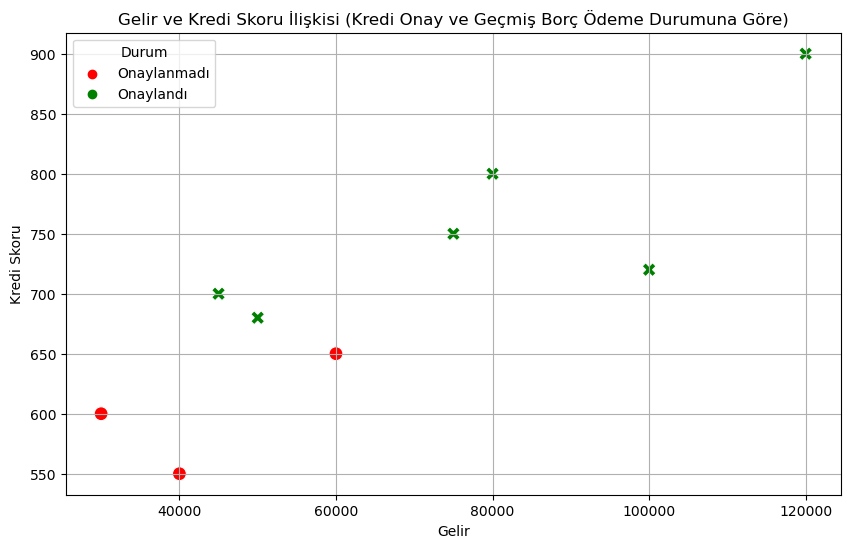

In [2]:
# Scatter Plot ile 4 veriyi tek bir grafikte göster
plt.figure(figsize=(10, 6))

# Özel renk paleti tanımla
custom_palette = {0: 'red', 1: 'green'}  # 0: Red, 1: Green

scatter = sns.scatterplot(
    x='Gelir', y='Kredi_Skoru', hue='Kredi_Onay', style='Gecmis_Borc_Odeme',
    data=df, palette=custom_palette, s=100
)
plt.title('Gelir ve Kredi Skoru İlişkisi (Kredi Onay ve Geçmiş Borç Ödeme Durumuna Göre)')
plt.xlabel('Gelir')
plt.ylabel('Kredi Skoru')
plt.grid(True)

# Legend ayarları
handles, labels = scatter.get_legend_handles_labels()
new_labels = ['Onaylanmadı', 'Onaylandı']
scatter.legend(handles=handles[1:], labels=new_labels, title='Durum')

plt.show()


#### Veri setimizi görselleşitiriyoruz. Örneğin burada geliri 60000 olan ve kredi skoru 650 olan birinin kredi isteği reddedilir. 

In [3]:
import warnings

from sklearn.linear_model import LogisticRegression

# Özellikler ve hedef sütunu ayırma
X = df[['Gelir', 'Kredi_Skoru', 'Gecmis_Borc_Odeme']]

y = df['Kredi_Onay']

# Modelin oluşturulması ve eğitilmesi
warnings.filterwarnings("ignore", category=UserWarning)

model = LogisticRegression()

model.fit(X, y)

LogisticRegression()

In [4]:
# Tahmin yapma

kredi_ornek = np.array([[58500,690,1]])  # gelir: 58500, kredi skoru: 690, geçmis odeme: 1 

tahmin = model.predict(kredi_ornek)

tahmin_olasiligi = model.predict_proba(kredi_ornek)

print("Tahmin: ", "Onay" if tahmin[0] == 1 else "Red")

print("Kredi Onay Olasılığı: {:.2f}%".format(tahmin_olasiligi[0][1] * 100))

Tahmin:  Onay
#### Kredi Onay Olasılığı: 68.54%


In [5]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score


# Veri setini eğitim ve test setlerine ayırma

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=99)

# Modelin eğitimi

model = LogisticRegression()

model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma

y_pred = model.predict(X_test)

# Doğruluk skorunun hesaplanması

accuracy = accuracy_score(y_test, y_pred)

print("Model Doğruluğu: {:.2f}%".format(accuracy * 100))

Model Doğruluğu: 66.67%


#### Modelin veri seti az olduğu için doğruluk oranlarının daha düşük çıkması da normaldir. Daha büyük veri seti kullanılarak daha gerçekçi doğruluk oranları elde edilebilir.